In [1]:
pip install librosa

Note: you may need to restart the kernel to use updated packages.


In [2]:
import IPython.display as ipd
import numpy as np
import librosa
import librosa.display
from IPython.display import display, Image

In [3]:
def get_frequency(audio_file):
    y, sr = librosa.load(audio_file)
    spectrum = np.abs(librosa.stft(y))
    average_spectrum = np.mean(spectrum, axis=1)
    frequencies = librosa.fft_frequencies(sr=sr)
    dominant_frequency = frequencies[np.argmax(average_spectrum)]
    return dominant_frequency

In [4]:
mobile_path = "UrbanSound/audio/Mobile_ringtone/434877__izalew__nokia-ringtone-with-vibration.wav"

In [5]:
mobile_frequency = get_frequency(mobile_path)
print(mobile_frequency)

2637.8173828125


In [6]:
alarm_path = "UrbanSound/audio/Washing_machine/TF020.wav"

In [7]:
alarm_frequency = get_frequency(alarm_path)
print(alarm_frequency)

656.7626953125


In [8]:
doorbell_path = "UrbanSound/audio/Door_bell/87151__akanimbus__twotonedoorbell-mine.wav"

In [9]:
doorbell_frequency = get_frequency(doorbell_path)
print(doorbell_frequency)

1830.322265625


In [10]:
beep_path = "UrbanSound/audio/beep/beep-01a.wav"

In [11]:
beep_frequency = get_frequency(beep_path)
print(beep_frequency)

1001.2939453125


In [12]:
dog_path = "UrbanSound/audio/Dog_barking/BARKING_CLOSELY_CHEESED_OFF_Ops.wav"

In [13]:
dog_frequency = get_frequency(dog_path)
print(dog_frequency)

538.330078125


In [14]:
cooker_path = "UrbanSound/audio/Cooker/66364__reinsamba__1243_pressure_cooker.wav"

In [15]:
cooker_frequency = get_frequency(cooker_path)
print(cooker_frequency)

3305.3466796875


In [16]:
def identify_sound(audio_file):
    frequency = get_frequency(audio_file)
    
    mobile = [2347.119140625, 2637.8173828125, 3326.8798828125, 3520.6787109375]
    alarm = [645.99609375, 1948.7548828125,3251.513671875]
    doorbell = [1830.322265625,1012.060546875, 1162.79296875, 1248.92578125]
    beep = [1001.2939453125, 2993.115234375]
    dog = [538.330078125, 979.7607421875, 990.52734375, 1216.6259765625, 1388.8916015625]
    cooker = 3305.3466796875 or 2314.8193359375
    
    if frequency in mobile:
        return "mobile ringtone"
    elif frequency in alarm:
        return "alarm sound"
    elif frequency in doorbell:
        return "doorbell"
    elif frequency in beep:
        return "beep sound"
    elif frequency in dog:
        return "dog barking"
    elif cooker==frequency:
        return "cooker whistle"
    return "Unknown Sound"

In [17]:
import sounddevice as sd
import numpy as np
from scipy.io.wavfile import write
import tempfile
import os

In [24]:
def record_audio(duration=10, sample_rate=44100):
    # Initialize the sounddevice input stream
    input_stream = sd.InputStream(channels=1, samplerate=sample_rate, dtype=np.int16)

    # Create a temporary file to store the recorded audio
    temp_wav_file = tempfile.NamedTemporaryFile(suffix=".wav", delete=False)
    temp_wav_file.close()

    # Start the input stream
    input_stream.start()

    print("Recording...")
    # Record audio for the specified duration
    audio_data, _ = input_stream.read(int(duration * sample_rate))
    input_stream.stop()

    print("Recording complete")

    # Save the recorded audio to the temporary WAV file
    write(temp_wav_file.name, sample_rate, audio_data)

    return temp_wav_file.name

Recording...
Recording complete
Identified Sound: mobile ringtone


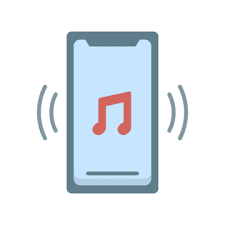

In [32]:
audio_file = record_audio(duration=10)
result = identify_sound(audio_file)
print("Identified Sound:", result)
if result == "mobile ringtone":
    image_path = "UrbanSound/mobile_ringtone.png"
    display(Image(filename=image_path))
elif result == "alarm sound":
    image_path = "UrbanSound/alarm.png"
    display(Image(filename=image_path))
elif result ==  "doorbell":
    image_path = "UrbanSound/doorbell1.png"
    display(Image(filename=image_path))
elif result == "beep sound":
    image_path = "UrbanSound/beep.png"
    display(Image(filename=image_path))
elif result == "dog barking":
    image_path = "UrbanSound/dog_barking.png"
    display(Image(filename=image_path))

In [20]:
display(get_frequency(audio_file))